In [147]:
import numpy as np
import pandas as pd
import json
import ndjson
import os
import pdb
import matplotlib.pyplot as plt
#import jsonlines

In [148]:
# set column width because of the max characters of 140 allowed in a tweet
pd.options.display.max_colwidth=200

In [149]:
# read the entire file into a python array
with open('realdonaldtrump.ndjson', encoding='utf8') as f:
    data = ndjson.load(f)


In [150]:
#place file into a dataframe for further exploratoritive use
df = pd.DataFrame(data)

In [151]:
len(df)

40241

In [152]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'favorite_count', 'favorited', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'retrieved_utc', 'retweet_count', 'retweeted', 'source', 'text',
       'truncated', 'user', 'possibly_sensitive', 'extended_entities',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweeted_status', 'withheld_copyright', 'withheld_in_countries',
       'withheld_scope', 'scopes'],
      dtype='object')

In [6]:
max(df.retweet_count)

321390

In [154]:
print(df.loc[31324])

contributors                                                                                                                                                                                                                    None
coordinates                                                                                                                                                                                                                     None
created_at                                                                                                                                                                                            Tue Nov 08 11:43:14 +0000 2016
entities                                                                                                                                                            {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}
favorite_count                                                                      

In [29]:
print(df.iloc[34757]['retweeted_status']['entities']['urls'][0]['display_url'][:])

twitter.com/i/web/status/9…


In [8]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df['retweet_count'])  
    
# filtering data
df[bool_series]  

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,possibly_sensitive,extended_entities,quoted_status,quoted_status_id,quoted_status_id_str,retweeted_status,withheld_copyright,withheld_in_countries,withheld_scope,scopes


In [9]:
print(np.sum([df['lang'] != 'en']))

671


In [10]:
list_for_drop = []
for i in range(len(df)):
    if (df.lang[i] != 'en'):
        list_for_drop.append(i)

In [11]:
print(len(list_for_drop))

671


In [12]:
df_new = df.drop(list_for_drop)

In [13]:
len(df_new)

39570

In [14]:
df_new.created_at[627]

'Thu Oct 06 13:49:25 +0000 2011'

In [15]:
plot_d = df_new['created_at']

In [133]:
from datetime import datetime
import time

x = [datetime.strptime(elem, '%a %b %d %H:%M:%S +0000 %Y').date() for elem in plot_d]
y = df_new.retweet_count
z = pd.DataFrame(x)
max_retweet = df_new.retweet_count.max()

In [155]:
#print(z)
print(df_new[df_new.retweet_count == max_retweet] == True)
#print(df_new.loc[31324].text)

       contributors  coordinates  created_at  entities  favorite_count  \
31324         False        False       False     False           False   

       favorited    geo     id  id_str  in_reply_to_screen_name  ...  \
31324      False  False  False   False                    False  ...   

       possibly_sensitive  extended_entities  quoted_status  quoted_status_id  \
31324               False              False          False             False   

       quoted_status_id_str  retweeted_status  withheld_copyright  \
31324                 False             False               False   

       withheld_in_countries  withheld_scope  scopes  
31324                  False           False   False  

[1 rows x 34 columns]


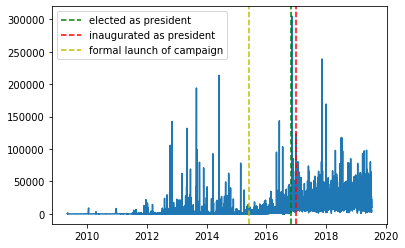

In [83]:
plt.plot(z, y)
plt.axvline(x=datetime.strptime('11-2016', '%m-%Y'),color='g',linestyle='--', label='elected as president')
plt.axvline(x=datetime.strptime('01-2017', '%m-%Y'),color='r',linestyle='--', label='inaugurated as president')
plt.axvline(x=datetime.strptime('06-2015', '%m-%Y'),color='y',linestyle='--', label='formal launch of campaign')
plt.legend()
plt.show()

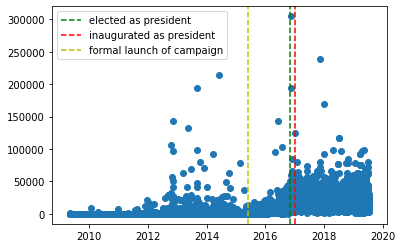

In [90]:
plt.scatter(z[0],y)
plt.axvline(x=datetime.strptime('11-2016', '%m-%Y'),color='g',linestyle='--', label='elected as president')
plt.axvline(x=datetime.strptime('01-2017', '%m-%Y'),color='r',linestyle='--', label='inaugurated as president')
plt.axvline(x=datetime.strptime('06-2015', '%m-%Y'),color='y',linestyle='--', label='formal launch of campaign')
plt.legend()


# Clean the data by:

1. Removing all irrelevant characters such as any non alphanumeric characters
2. Tokenize the text by separating it into individual words
3. Remove words that are not relevant, such as “@” twitter mentions or urls
4. Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
5. Considering combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
6. Considering lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)

In [91]:
df_clean = pd.DataFrame(df_new, columns = ('retweet_count', 'text'))

In [92]:
df_clean.retweet_count

0         501
1          33
2          13
3          12
4        1422
         ... 
40236    6331
40237    7694
40238    2540
40239    4533
40240    5236
Name: retweet_count, Length: 39570, dtype: int64

In [93]:
text_of_tweets = df_clean['text']


In [120]:
#how many hashtags avg used in a tweet
def check_hashtag(x):
    count=0
    for i in x:
        if ('#' or '@') in i:
            count+=1
    return count

hashtags = lambda h: check_hashtag(h)
df_hashtags = pd.DataFrame(text_of_tweets.apply(hashtags))
print(df_hashtags.max())

text    10
dtype: int64


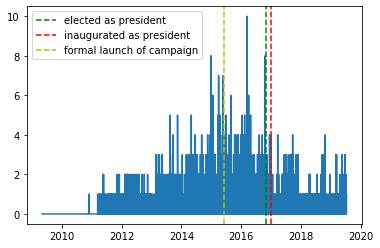

In [117]:
plt.plot(z, df_hashtags)
plt.axvline(x=datetime.strptime('11-2016', '%m-%Y'),color='g',linestyle='--', label='elected as president')
plt.axvline(x=datetime.strptime('01-2017', '%m-%Y'),color='r',linestyle='--', label='inaugurated as president')
plt.axvline(x=datetime.strptime('06-2015', '%m-%Y'),color='y',linestyle='--', label='formal launch of campaign')
plt.legend()
plt.show()

In [126]:
print(df_hashtags.sum(skipna=True))
print(df_hashtags.mean(skipna=True))

text    7064
dtype: int64
text    0.178519
dtype: float64


In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text(txt):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    txt = txt.lower()
    txt = re.sub('\[.*?@\#]', ' ', txt)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt)
    txt = re.sub('\w*\d\w*', ' ', txt)
    txt = re.sub('\n', ' ', txt)
    return txt

round1 = lambda x: clean_text(x)

In [ ]:
# The updated text
data_clean_first = pd.DataFrame(text_of_tweets.apply(round1))
data_clean_first.text[34757]
#data_clean_first.head()



In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# The updated text
data_clean_second = pd.DataFrame(data_clean_first.text.apply(round2))
data_clean_second.text[40030:40035]
#data_clean_second.head()

In [ ]:
# Apply a third round of cleaning
def clean_text_round3(text):
    '''Get rid of the http sites.'''
    text = re.sub('http\\w*', ' ', text)
    
    return text

round3 = lambda x: clean_text_round3(x)

In [ ]:
# The updated text
data_clean_third = pd.DataFrame(data_clean_second.text.apply(round3))
data_clean_third.text[34757]

In [ ]:
# Create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import pickle

cv = CountVectorizer(stop_words='english')
data_dtm = pd.DataFrame(cv.fit_transform(data_clean_third.text).toarray(), columns=cv.get_feature_names())

In [ ]:
list_for_drop = cv.get_feature_names()[-72:-1]


In [ ]:
data_clean_third.text[34757]

In [ ]:
number_for_drop = []
for i in range(len(data_clean_third.text)-1):
    for sign in list_for_drop:
        if re.search(sign, data_clean_third.text[i]):
            print(i, '', sign)
            number_for_drop.append(i)
            


In [ ]:
len(number_for_drop)